# COGS 108 - Final Project 

# Overview

Every year, tens of thousands of people commit suicide in the United States alone. What our group aims to do is to see if there is any correlation between those that commit suicide and the level of education that they had. In doing so, we could have a basis for research and future projects that aim to further help those that are at increased risk of suicide if we find that one particular group is more susceptible.

# Names / ID
- Lan Wei
- Sean Race
- Weilun Yao
- Shine Paek
- Kyosuke Goto

# Group Members IDs

- A14582741
- A13981319
- A15017352
- A13395708
- A15709698

# Research Question

### How does educational attainment level affect the likelihood of suicide in United States? In addition, are there any other factors, such as age, sex, race, etc. that play a role in suicide rates in the US?


## Background and Prior Work

## References
1) World Health Organization:                                                        
https://www.who.int/mental_health/prevention/suicide/suicideprevent/en/<BR>

2) Wikipedia:                                
https://en.wikipedia.org/wiki/Suicide<BR>

3) Mental Health, Happiness, Economics, Human Freedom project dataset:                                
https://www.kaggle.com/rblcoder/mental-health-happiness-economics-human-freedom/log<BR>

4) Suicide Rates Overview 1985-2016:                                
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016<BR>

5) Does the level of education influence completed suicide? A nationwide register study:                           https://www.sciencedirect.com/science/article/pii/S0165032712006179<BR>


Suicide has always been a highly debated topic. As the World Health Organization pointed out, close than 800 000 people die every year due to suicide, which is one person every 40 seconds. Furthermore, suicide rates have even gone up the past decade, making it the 10th leading cause of death worldwide. As an issue then, the causations and correlations of suicide definitely is a topic that is significant and relative to every person. As a topic of high importance, multiple prior datasets and projects have been done on suicide correlations. World Health Organization has provided many statistics on suicide including gender, age, country, income, and more. Projects and datasets on Kaggle have, in addition, related socio-economic info with suicide rates by year and country. Here at UCSD (and many college campuses throughout the US), the pressure to perform at such a high level consistently is very apparent in students’ day to day lives. Whether it be pressure from our parents, society, or even ourselves, this mentality of pushing ourselves can sometimes leave us feeling depressed, isolated, and even suicidal.

What our project aims to do is to analyze suicidal rates from another aspect which is how educational attainment and learning outcomes affect it. Not surprisingly, the relationship between suicide and educational attainment have been analyzed previously too. For example, a research in the scholarly peer reviewed Journal of Affective Disorders has looked at the correlation between educational attainment and completed suicide taking data from the Italian Mortality database. The conclusions that they have come to have sadly shown that of both males and females from 15 to 64 years old, suicide victims were found significantly more often to have a higher education compared with those of their same sex and age counterparts that died from natural causes. People with higher levels of educationt, compared with those with only a maximum primary school/high school degree, show a significantly higher likelihood of committing suicide rather than dying of a natural cause.

Our project wants to furthermore build upon these previous findings and look into this relationship more with data from the United States. We would be trying to look at a larger age range than other studies in the past in order to gather more statistically significant data throughout all ages, rather than just young adults. And in addition, if time permits, we would want to see how other factors, such as age, gender, and so on, affect the relationship between these two factors.

# Hypothesis


### Questions:
1) How does one’s education level affect the likelihood of them committing suicide in the United States?<BR>
2) Is it more likely that those who attend top-tier schools have a lower or higher suicide rate?<BR>
3) Do other factors (sex, age group, GDP, generation) have an effect on the relationship between educational attainment and suicide rates?<BR>
    
### Hypothesis:
As we stated in the background, it has been found that suicide rates have been going up steadily in the past decade. We believe that people with higher educations are more likely to commit suicide than those who did not pursue a higher education after high school/secondary school. We believe this occurs due to the added stress and high expectations placed upon achieving a higher education as well as the disappointment and shame placed upon individuals if such expectations are not met.

# Dataset

### Dataset Name: 
Mortality Multiple Cause Files

### Site: 
Centers for Disease Control and Prevention - National Center for Health Statistics<BR>
https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm

### Dataset Link:
2017 Dataset
&nbsp;&nbsp;&nbsp;&nbsp;
ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/mortality/mort2017us.zip
<BR>2016 Dataset
&nbsp;&nbsp;&nbsp;&nbsp;
ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/mortality/mort2016us.zip
&nbsp;&nbsp;&nbsp;&nbsp;
<BR>2015 Dataset
&nbsp;&nbsp;&nbsp;&nbsp;
ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/mortality/mort2015us.zip
<BR>2014 Dataset
&nbsp;&nbsp;&nbsp;&nbsp;
ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/mortality/mort2014us.zip
<BR>2013 Dataset
&nbsp;&nbsp;&nbsp;&nbsp;
ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/mortality/mort2013us.zip

### Number of Observations:
   Total        : 13,520,719       
2017 Dataset: 2,820,034       
2016 Dataset: 2,749,864      
2015 Dataset: 2,718,198      
2014 Dataset: 2,631,171      
2013 Dataset: 2,601,452      

### Fields:
Age<BR>
Autopsy<BR>
Cause<BR>
Day of Week<BR>
Education<BR>
Hispanic Origin<BR>
Marital Status<BR>
Method of Disposition<BR>
Month of Death<BR>
Place of Death<BR>
Place of Injury<BR>
Race<BR>
Resident Status<BR>
Sex<BR>
etc...

### Description:
These datasets are publicly available within the National Vital Statistics System provided by the Center for Disease Control and Prevention. The Morality data used provides national demographic, cause of death information. Public use file omits sensitive information such as location (state/county) and exact dates of death. Available data year ranges from 1968 to 2017. We will be analyzing the years 2013 to 2017.

Each of these dataset are detailed and contain many entries. For example, in the year 2013 alone there are about 2,600,000 deaths recorded. This means that for our project, we have more than enough data to work with. Furthermore, since this dataset has both education aspects and manner-of-death aspects (in which one of the manners is suicide), it is a good dataset for our research question.

Each data file contains tapes (rows) with fields identified by column number. Since the data from each year uses identical field location, they were able to be combined without adjustments.





# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import csv
import io
import glob
import gc
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


# Data Cleaning

The obtained datasets have the extension ".DUSMCPUB" and are compressed using Zip. Since each of uncompressed data file was more than 1GB in size, we needed to clean/process the data files individually by years to work within the limited memory resource. In order to extract and process the data we defined several functions:

   - <strong>extractZip</strong> : Extracts specified data files from zip archive in directory
   - <strong>read_data</strong> :  Create pandas DataFrame from single Mortality data file (.DUSMCPUB)
   - <strong>get_cdf</strong> :    Process individual data frames (by year) and output combined data frame



In [2]:
'''
    Extracts data file from zip archive in directory
    Parameter: Integer Start year, Integer End year (inclusive)
    Return Value: None
'''
def extractZip(start,end):
    for year in range(start,end+1):
        file = 'mort{}us.zip'.format(year)
        try:
            with ZipFile(file,'r') as z:
                z.extractall()
                
        except FileNotFoundError:
            print('MISSING ' + file)
        else:
            print('UNZIPPED ' + file)

In [3]:
## Extract zip files from year 2013 to 2017
#extractZip(start=2013, end=2017)

## Make sure data file exist for 2013-2017
assert len(glob.glob('VS1[3-7]MORT.DUSMCPUB')) == 5

Since the pandas library does not provide a builtin function to read the column seperated data, we wrote the function 'read_data' to transform our dataset into data frames. The function converts each row (string) in the data file into a row in data frame by interpreting the values found in specific columns. StringIO was required to effeciently use memory. Data were read in as objects types because the digits in the dataset represents code/key instead of numerical value. While there were many fields in the raw dataset, for the purpose of our project we selected:

   - Data year
   - Manner of Death
   - Sex
   - Race
   - Education Reporting Flag
   - Education 1989 Revision
   - Education 2003 Revision
   - Age Recode 52
   - Hispanic origin
              


In [4]:
'''
    Read in single CDC Mortality data file (.DUSMCPUB)
    Parameter: String filename
    Return Value: pandas DataFrame
'''
def read_data(filename):
    
    # Specify column order
    fields = ['Data year',
              'Manner of Death',
              'Sex',
              'Race',
              'Education Reporting Flag',
              'Education 1989 Revision',
              'Education 2003 Revision',
              'Age Recode 52',
              'Hispanic origin']

    out = io.StringIO()
    cw = csv.DictWriter(out,fields)
    cw.writeheader()

    # Open data file
    with open(filename,'r') as inFile:
        for line in inFile:
            
            # Specify field name and tape location
            row = {
                'Education 1989 Revision' :line[60:62],
                'Education 2003 Revision' :line[62],
                'Education Reporting Flag':line[63],
                'Sex'                     :line[68],
                'Age Recode 52'           :line[74:76],
                'Data year'               :line[101:105],
                'Manner of Death'         :line[106],
                'Race'                    :line[444:446],
                'Hispanic origin'         :line[483:486]            
              }
            cw.writerow(row)

    out.seek(0)
    return pd.read_csv(out, dtype=object)

In the function 'read_data', we were able to select which fields to read from the data file. 'read_data' is a helper function to the function 'get_cdf' where majority of data cleaning takes place. This function accepts 3 arguments: start year, end year, and (education) revision year. Each data frame corresponding to the year between end year and start year is processed as below.

The data set from CDC was mostly clean even though missing values were found for 'Manner of Death','Education 1989 Revision','Education 2003 Revision' columns. Any missing values (blank space) were replaced by NaN values so it can be interpreted. 

First we removed any entries where 'Manner of Death' was not Suicide (2) or Natural (7). In this process, missing values and irrelevant data were removed.

Next we checked if any rows were missing both 'Education 1989 Revision' and 'Education 2003 Revision' values. The results showed that the entries either contained 1989 revision code or 2003 revision values. Although we attempted to merge the categories for 1989 and 2003 revisions, this proved to be difficult because 1989 only showed the number of years of school attended, whereas 2003 was based on education levels and degrees obtained. For example, 'some college credit, but no degree' may mean any years of college and college degree may be obtained in various years.

Using the revision argument to the function, we decided to create seperate output data frames that only contain entries from either 1989 educational revision or 2003 educational revision. In each case, we removed the column for 'Education Reporting Flag' used to distinguish entries by revision and the column for the alternative revision.

Upon inspection of the data, we found that the included age ranged from 'Under 1 hour' (00) to '125 years and over' (51). First, we combined all the ages from 'under 1 hour' (00) to '4 years' (26) into 'less than 5 years old' to represent age group before K-12 education. Furthermore we felt that in our analysis, suicide before age 5 was unusual. Next, we took additional precaution by combining the eight ages groups above 90 into 'greater than 90'. This was done to protect the identities of relatively few high-aged individuals who had passed away by suicide in that specific year.

After renaming the columns for easier reference, each processed DataFrame (by year) were combined to form a combined data frame representing processed data from year 2013 to 2017.


In [5]:
'''
    Output cleaned, combined DataFrame from several CDC Mortality file (.DUSMCPUB)
    Parameter: Integer Start year, Integer End year, Integer Education Revision year
    Return Value: pandas DataFrame
'''
def get_cdf(start, end, revision=None):

    dfs = []
    for year in range(start%100,(end+1)%100):
        file = 'VS{}MORT.DUSMCPUB'.format(year)
        print('{}    rev: {}'.format(file, revision))
        
        # Read in this year's dataset
        df = read_data(file)

        #Turn empty value into NaN
        df.replace(to_replace=r'^\s+$', value=np.nan, regex=True, inplace=True)
                
        # Show Size
        # display(df.shape)
            
        # Show Missing Value
        # display(df.isnull().sum())

        # Remove Death except Natural or Suicide
        df = df[(df['Manner of Death'] == '2') | (df['Manner of Death'] == '7')]
        
        # Check for Missing Education Data (missing both 1989 and 2003)
        no_edu = sum((df['Education 1989 Revision'].isnull()) 
                     & (df['Education 2003 Revision'].isnull()))
        assert no_edu == 0    

        # Remove Revision        
        if revision == 1989:
            df = df[(df['Education Reporting Flag'] == '0')]
            df.drop(labels=['Education 2003 Revision', 'Education Reporting Flag'],
                    axis=1, inplace=True)
            df.rename({'Education 1989 Revision':'Education'}, axis=1, inplace=True)
        elif revision == 2003:
            df = df[(df['Education Reporting Flag'] == '1')]
            df.drop(labels=['Education 1989 Revision', 'Education Reporting Flag'],
                    axis=1, inplace=True)
            df.rename({'Education 2003 Revision':'Education'}, axis=1, inplace=True)

        # Combine age below 5-9 years old (01~26) to 'Less than 5 years'
        age_lt5 = [ str(i).zfill(2) for i in range(1,27) ]
        df['Age Recode 52'].replace({age: '26' for age in age_lt5},
                                    regex=True, inplace=True)

        # Combine age above 90 years old (44~51) to '90 years and over'
        age_gt90 = [ str(i) for i in range(44,52) ]
        df['Age Recode 52'].replace({age: '44' for age in age_gt90},
                                    regex=True, inplace=True)        
    
        # Rename the Columns
        df.rename({'Data year':'Year',
            'Manner of Death':'Cause',
            'Place of Death':'Location',
            'Age Recode 52':'Age'
           }, axis=1, inplace=True)
       
        # Append data frame
        dfs.append(df)
        
        del df
        gc.collect()
        
    return pd.concat(dfs)

In [6]:
## Create DataFrame from years 2013-2017
cdf_1989 = get_cdf(start=2013, end=2017, revision=1989)
cdf_2003 = get_cdf(start=2013, end=2017, revision=2003)

VS13MORT.DUSMCPUB    rev: 1989
VS14MORT.DUSMCPUB    rev: 1989
VS15MORT.DUSMCPUB    rev: 1989
VS16MORT.DUSMCPUB    rev: 1989
VS17MORT.DUSMCPUB    rev: 1989
VS13MORT.DUSMCPUB    rev: 2003
VS14MORT.DUSMCPUB    rev: 2003
VS15MORT.DUSMCPUB    rev: 2003
VS16MORT.DUSMCPUB    rev: 2003
VS17MORT.DUSMCPUB    rev: 2003


In [7]:
## Size of Data and Missing Values by Column
print('Revision 2003')
display(cdf_2003.shape)
display(cdf_2003.isnull().sum())

print('Revision 1989')
display(cdf_1989.shape)
display(cdf_1989.isnull().sum())

Revision 2003


(10337827, 7)

Year               0
Cause              0
Sex                0
Race               0
Education          0
Age                0
Hispanic origin    0
dtype: int64

Revision 1989


(510110, 7)

Year               0
Cause              0
Sex                0
Race               0
Education          0
Age                0
Hispanic origin    0
dtype: int64

Comparing the size of data using 2003 Education Revision and size of data using 1989 Education Revision,  we discovered that the later was less than 5% of the total. Therefore we decided it was safe to not include the entries using 1989 Education Revision.

In [8]:
print('Ratio by Educational Revision')
display(cdf_1989.shape[0]/(cdf_1989.shape[0] + cdf_2003.shape[0]))

Ratio by Educational Revision


0.04702368754538305

In [9]:
## Dictionary mapping CODE and MEANING

# Manner of Death
cause_dict = {  '1': 'Accident',
                '2': 'Suicide',
                '3': 'Homicide',
                '4': 'Pending Investigation',
                '5': 'Could not determine',
                '6': 'Self-Inflicted',
                '7': 'Natural' }


# Education (2003 revision)
edu_dict = { '1': '8th grade or less',
             '2': '9-12th grade, no diploma',
             '3': 'high school graduate or GED completed',
             '4': 'some college credit, but no degree',
             '5': 'Associate degree',
             '6': "Bachelor's degree",
             '7': "Master's degree",
             '8': 'Doctorate or Professional degree',
             '9': 'Unknown' }


# Age Recode 52
age_dict = { '26':'Less than 5 years',
             '27':'5 - 9 years',
             '28':'10 - 14 years',
             '29':'15 - 19 years',
             '30':'20 - 24 years',
             '31':'25 - 29 years',
             '32':'30 - 34 years',
             '33':'35 - 39 years',
             '34':'40 - 44 years',
             '35':'45 - 49 years',
             '36':'50 - 54 years',
             '37':'55 - 59 years',
             '38':'60 - 64 years',
             '39':'65 - 69 years',
             '40':'70 - 74 years',
             '41':'75 - 79 years',
             '42':'80 - 84 years',
             '43':'85 - 89 years',
             '44':'90 years and over',
             '52':'Age not stated'}


# Race
race_dict = { '01':'White',
              '02':'Black',
              '03':'American Indian (Includes Aleuts and Eskimos)',
              '04':'Chinese',
              '05':'Japanese',
              '06':'Hawaiian (includes Part-Hawaiian)',
              '07':'Filipino',
              '08':'Other Asian or Pacific Islander',
              '18':'Asian Indian',
              '28':'Korean',
              '38':'Samoan',
              '48':'Vietnamese',
              '58':'Guamanian',
              '68':'Other Asian or Pacific Islander',
              '78':'Combined other Asian or Pacific Islander',
              '00':'Other races' }


In [10]:
## Mapped Code to actual meanings
cdf_2003['Cause'] = cdf_2003['Cause'].map(cause_dict)
cdf_2003['Education'] = cdf_2003['Education'].map(edu_dict)
cdf_2003['Age'] = cdf_2003['Age'].map(age_dict)
cdf_2003['Race'] = cdf_2003['Race'].map(race_dict)

display(cdf_2003.head(n=5))

,Year,Cause,Sex,Race,Education,Age,Hispanic origin
53204,2013,Natural,F,White,"9-12th grade, no diploma",75 - 79 years,100
53205,2013,Natural,F,Black,"9-12th grade, no diploma",85 - 89 years,100
53206,2013,Natural,M,White,"some college credit, but no degree",90 years and over,100
53207,2013,Natural,F,White,8th grade or less,85 - 89 years,100
53208,2013,Natural,F,White,8th grade or less,90 years and over,100


In [11]:
## Write processed data to file
cdf_2003.to_csv('MORT_13_17.csv', index=False)

## Delete DataFrame
del cdf_2003
del cdf_1989

# Data Visualization

In [12]:
# Read CSV
cdf = pd.read_csv('MORT_13_17.csv', dtype=object)
cdf.head()

,Year,Cause,Sex,Race,Education,Age,Hispanic origin
0,2013,Natural,F,White,"9-12th grade, no diploma",75 - 79 years,100
1,2013,Natural,F,Black,"9-12th grade, no diploma",85 - 89 years,100
2,2013,Natural,M,White,"some college credit, but no degree",90 years and over,100
3,2013,Natural,F,White,8th grade or less,85 - 89 years,100
4,2013,Natural,F,White,8th grade or less,90 years and over,100


## Relationships:

### 1. Relationship Between Education Level and Number of Suicide 

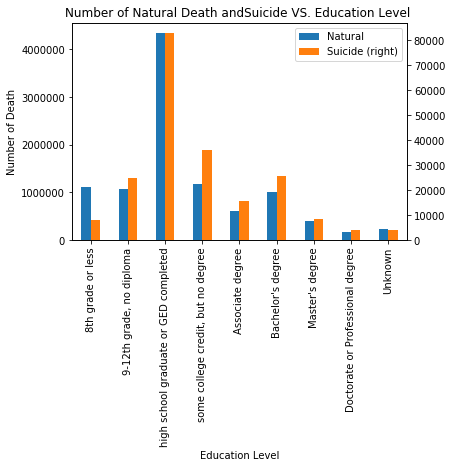

In [13]:
#suicide deaths vs natural deaths by education
#get value_counts of both Natural and Suicide deaths by education
NE = cdf[cdf['Cause'] == 'Natural']['Education'].value_counts().\
    reindex(list(edu_dict.values()))
SE = cdf[cdf['Cause'] == 'Suicide']['Education'].value_counts().\
    reindex(list(edu_dict.values()))

#convert value counts to list
NEL = NE.tolist()
SEL = SE.tolist()

#combine value counts into new dataframe
CombinedEducationData = pd.DataFrame({'Natural': NEL,'Suicide': SEL},
                                     index=list(edu_dict.values()))

#calibrate natural and suicide deaths each based on their own y-axis
ced_plt = CombinedEducationData.plot(kind='bar',
                                     secondary_y= 'Suicide',
                                     title = "Number of Natural Death and"\
                                             "Suicide VS. Education Level ")

ced_plt.set_xlabel("Education Level")
ced_plt.set_ylabel("Number of Death")

plt.show()

Above is a histogram comparing the number of natural deaths and suicides, arranged by education level. On the right in orange are the statistics of suicides, and on the left in blue are those for natural deaths. They are represented by different colors, and different y-axis values due to significantly lower values in suicide reports. Thus, the graph bars were made to be more proportional to one another and given different values. Both natural, and suicide deaths had the highest demographic at “high school graduate, or GED completed education level”.

Similarly the second highest education level for suicides as well as natural deaths is “some college, but no degree”, followed by “Bachelor’s Degree”, and “9th-12th grade (with no diploma)”. We can explain said findings more as a correlation between the different proportions of education already found in the population, and the consequent death tolls as a direct result of that.

### 2. Relationship between Gender and Number of Suicide

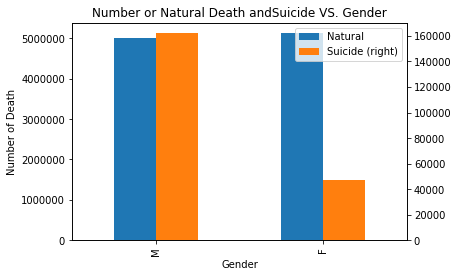

In [14]:
#suicide deaths vs natural deaths by gender
#get value_counts of both Natural and Suicide deaths
NG = cdf[cdf['Cause'] == 'Natural']['Sex'].value_counts()
SG = cdf[cdf['Cause'] == 'Suicide']['Sex'].value_counts()

#convert value counts to list
NGL = NG.tolist()
SGL = SG.tolist()

#combine value counts into new dataframe
CombinedGenderData = pd.DataFrame({'Natural': [NGL[1], NGL[0]],
                                   'Suicide': [SGL[0], SGL[1]]},
                                   index=['M','F'])

#calibrate natural and suicide deaths each based on their own y-axis
CGD_plt = CombinedGenderData.plot(kind='bar',
                                  secondary_y= 'Suicide',
                                  title = "Number or Natural Death and"\
                                           "Suicide VS. Gender")

CGD_plt.set_xlabel("Gender")
CGD_plt.set_ylabel("Number of Death")


plt.show()

Above is a histogram that compares natural deaths and suicides in both males & females. On the right in orange are the statistics of suicides, and on the left in blue are those for natural deaths. They are represented by different colors, and different y-axis values due to significantly lower values in suicide reports. Thus, the graph bars were made to be more proportional to one another and given different values.

There seem to be a similar number of natural deaths reported in both males, and females. However there seem to be a significantly higher proportion of male deaths by suicide as opposed to females deaths by suicide. This shows us that though natural deaths are split evenly between males, and females, more males died of reported suicides than females.

### 3. Relationship between Age Group and Number of Suicide

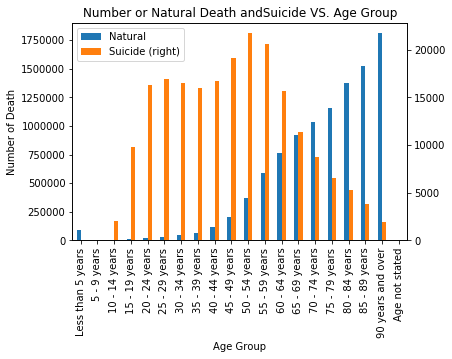

In [15]:
#suicide deaths vs natural deaths by age

#get value_counts of both Natural and Suicide deaths by age
NA = cdf[cdf['Cause'] == 'Natural']['Age'].value_counts().\
        reindex(list(age_dict.values()))
SA = cdf[cdf['Cause'] == 'Suicide']['Age'].value_counts().\
        reindex(list(age_dict.values()))

#convert value counts to list
NAL = NA.tolist()
SAL = SA.tolist()

#combine value counts into new dataframe
CombinedAgeData = pd.DataFrame({'Natural': NAL,'Suicide': SAL},
                               index=list(age_dict.values()))

#calibrate natural and suicide deaths each based on their own y-axis
cad_plt = CombinedAgeData.plot(kind='bar',
                               secondary_y= 'Suicide',
                               title = "Number or Natural Death and"\
                                        "Suicide VS. Age Group" )

cad_plt.set_xlabel("Age Group")
cad_plt.set_ylabel("Number of Death")

plt.show()

Above are bars that graph the number of natural, and suicide deaths by age group. The x-axis represents the different age groups from less than 5 years old, to 90 years and older, increasing by five year increments. The y axis shows different number of death values. The left side is for natural death values, and the right is for suicide death values. There were significantly less suicide reports, so their values were lowered so the bars would be proportional to that of the natural deaths. Natural deaths increase exponentially with age, which is as would be expected, as most natural deaths are associated with health risks from old age.

Additionaly, suicide rates seem to decrease with old age, while peaking at 50-54 years. Though there is a slight decrease in suicide rates from 30 years to 40 years of age. The decrease in suicide rates, and increase in natural deaths can be attributed to one another, as when one increases the other decreases. This is also apparent in earlier age groups from 5 years old to 40 years old, where suicide rates are still relatively low.

### 4. Relationship between Race and Number of Suicide

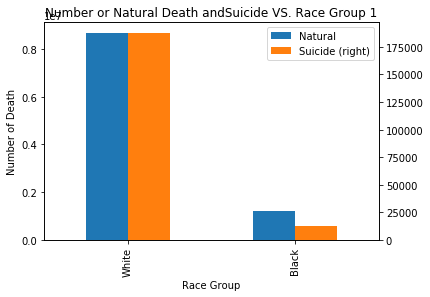

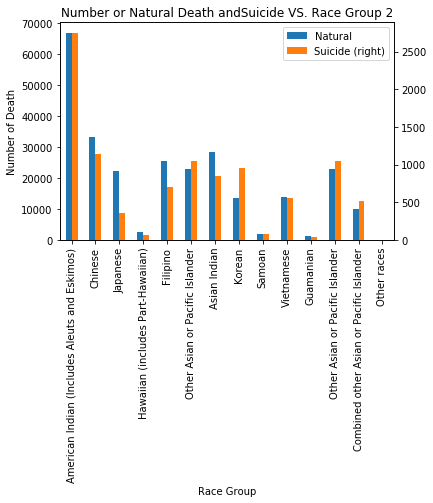

In [16]:
#suicide deaths vs natural deaths by race

#get value_counts of both Natural and Suicide deaths by age
NR = cdf[cdf['Cause'] == 'Natural']['Race'].value_counts().\
    reindex(list(race_dict.values()))
SR = cdf[cdf['Cause'] == 'Suicide']['Race'].value_counts().\
    reindex(list(race_dict.values()))

#convert value counts to list
NRL = NR.tolist()
SRL = SR.tolist()

#create lists for other races other than black or white
NOther = NRL[2:]
SOther = SRL[2:]
otherIndex = list(race_dict.values())[2:]

#combine value counts into new dataframe
CombinedRaceWBData = pd.DataFrame({'Natural': [NRL[0],NRL[1]],
                                   'Suicide': [SRL[0],SRL[1]]},
                                   index=['White','Black'])
CombinedRaceOtherData = pd.DataFrame({'Natural': NOther,'Suicide': SOther},
                                     index=otherIndex)

#calibrate natural and suicide deaths each based on their own y-axis
cr1 = CombinedRaceWBData.plot(kind='bar',
                              secondary_y= 'Suicide',
                              title = "Number or Natural Death and"\
                                       "Suicide VS. Race Group 1")
cr2 = CombinedRaceOtherData.plot(kind='bar',
                                 secondary_y= 'Suicide',
                                 title = "Number or Natural Death and"\
                                          "Suicide VS. Race Group 2")

cr1.set_xlabel("Race Group")
cr1.set_ylabel("Number of Death")

cr2.set_xlabel("Race Group")
cr2.set_ylabel("Number of Death")


plt.show()

### Graph 4a:
The bar plots below show the different number of natural, and suicide deaths by race groups, namely for White, and Black populations. The x-axis shows the two race groups being compared, given that they had the highest proportion of reported deaths. The y-axis shows different numbers of death values. The left side is for natural death values, and the right is for suicide death values. There were significantly less suicide reports, so their values were lowered so the bars would be proportional to that of the natural deaths. Both populations show significantly less deaths by suicide as opposed to those by natural deaths. However, the histogram does show that White populations have significantly more suicides in proportion to natural deaths, as opposed to Black populations where there are proportionately far less suicides than natural deaths.

### Graph 4b:
The bar plots below show the different number of natural, and suicide deaths by race groups. The x-axis names the fourteen other minority race groups being compared, of which there were significantly less reported data. The y-axis shows different numbers of death values. The left side is for natural death values, and the right is for suicide death values. There were significantly less suicide reports, so their values were lowered so the bars would be proportional to that of the natural deaths. Because we are comparing multiple people groups, we need to look more at the difference between natural and suicde deaths within the same people group as opposed to comparing values with one another -- given that there were higher reports of some people groups over others. Suicide bar is higher for “Other Asian & Pacific Islander”, and “Korean”.

## Trends:

### 1. Trend of Suicide Death over Years By Education Level

Education,8th grade or less,"9-12th grade, no diploma",high school graduate or GED completed,"some college credit, but no degree",Associate degree,Bachelor's degree,Master's degree,Doctorate or Professional degree
Year,,,,,,,,
2013,1426,4037,14047,6103,2511,4252,1360,710
2014,1579,4622,15356,6726,2857,4754,1618,735
2015,1606,5091,16853,7423,3259,5256,1754,864
2016,1651,5397,17745,7741,3358,5461,1872,861
2017,1727,5712,18822,8142,3467,5788,1852,915


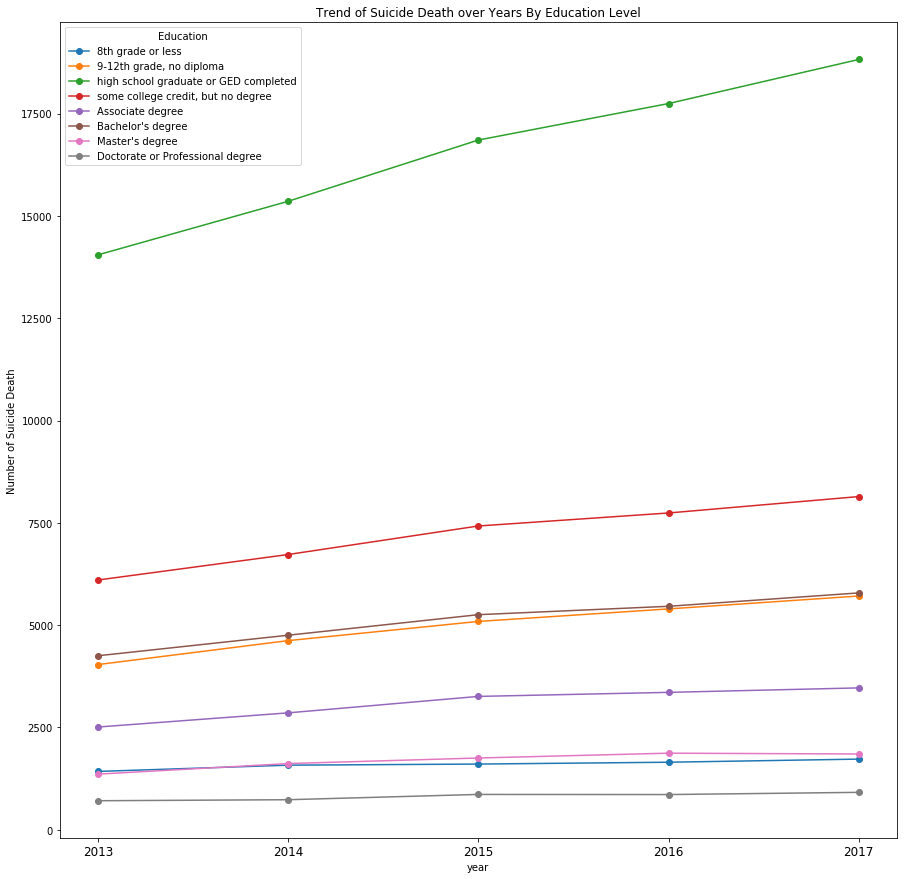

In [17]:
# Suicide Death over Years

# Get the df of suicide by education
df_s = cdf[cdf['Cause'] == 'Suicide'].groupby([cdf['Year'],cdf['Education']]).size()
df_s = df_s.unstack()[[edu_dict[str(i)] for i in range(1,9)]]

# plot and style
display(df_s)
df_s.plot(linestyle='-', 
          marker='o',
          figsize=(15,15),
          title='Trend of Suicide Death over Years By Education Level')
plt.xticks(list(range(len(df_s.index))), df_s.index, fontsize=12)
plt.xlabel("year")
plt.ylabel("Number of Suicide Death")

plt.show()
del df_s

These trend lines show suicide death over the past years from 2013 to 2017 by education level. Overall, each trend line shows a steady incline which can be attributed to increasing population levels. However we can see that the trend line for “high school graduate or GED equivalent”, which also started with the highest suicide deaths continues to increase much faster than the others.

### 2. Trend of Natural Death over Years By Education Level

Education,8th grade or less,"9-12th grade, no diploma",high school graduate or GED completed,"some college credit, but no degree",Associate degree,Bachelor's degree,Master's degree,Doctorate or Professional degree
Year,,,,,,,,
2013,213008,192411,756622,198592,97463,165572,64463,26102
2014,219909,206618,819163,217943,111545,182780,72978,28493
2015,220985,212259,852233,228920,121047,198988,80026,31404
2016,232637,234696,942777,257075,135341,222957,92051,36584
2017,229499,235307,975720,270170,142383,235788,98245,39187


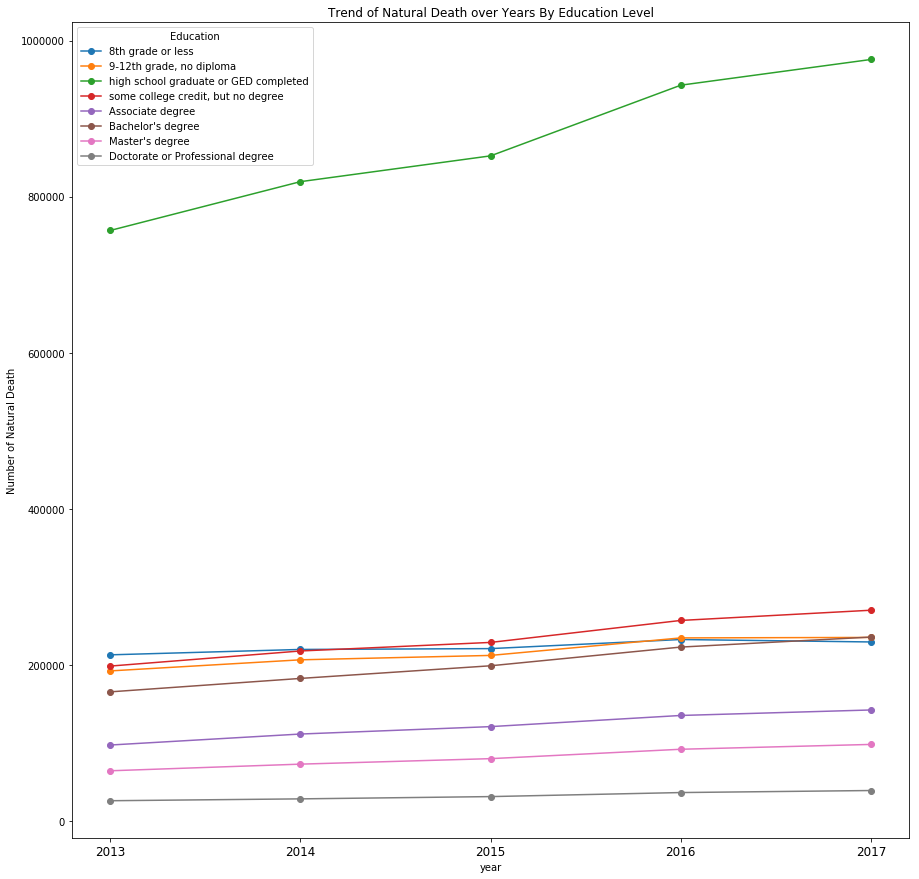

In [18]:
# Natural Death over Years
df_n = cdf[cdf['Cause'] == 'Natural'].groupby([cdf['Year'],cdf['Education']]).size()
df_n = df_n.unstack()[[edu_dict[str(i)] for i in range(1,9)]]
display(df_n)
df_n.plot(linestyle='-', 
          marker='o',
          figsize=(15,15),
          title='Trend of Natural Death over Years By Education Level')
plt.xticks(list(range(len(df_n.index))), df_n.index, fontsize=12)

plt.xlabel("year")
plt.ylabel("Number of Natural Death")

plt.show()
del df_n

These trend lines show natural death over the past years from 2013 to 2017 by education level. Though there is also a steady incline, there seems to be less dramatic of increases as opposed to the suicide trend lines. Again the “high school graduate, or GED equivalent” education level also started with the highest number of natural deaths and shows the highest increase over time.

## Proportion

### 1. Proportion of Education Level by Gender

Education,8th grade or less,"9-12th grade, no diploma",high school graduate or GED completed,"some college credit, but no degree",Associate degree,Bachelor's degree,Master's degree,Doctorate or Professional degree,Unknown
Sex,,,,,,,,,
F,0.032362,0.103748,0.340074,0.187593,0.098947,0.149224,0.054952,0.015271,0.017831
M,0.039821,0.123022,0.411501,0.168102,0.066425,0.113786,0.036116,0.020734,0.020493


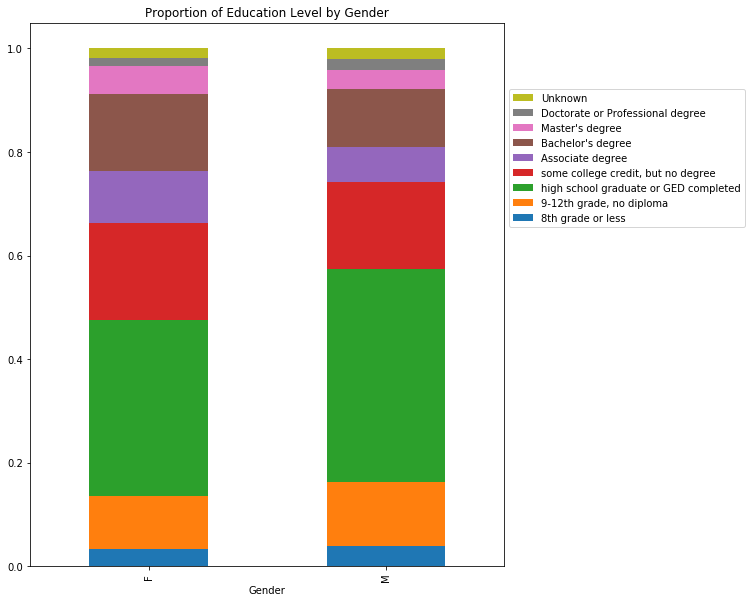

In [19]:
# Calculate Proportion of Education Level by Gender
g_df = cdf[cdf['Cause'] == 'Suicide'].groupby([cdf['Sex'],cdf['Education']]).size()
g_df = g_df.groupby(level=[0]).apply(lambda x: x / x.sum()).unstack()
g_df = g_df[list(edu_dict.values())]

# Show table
display(g_df)

# Graph stacked bar plot
fig, axes = plt.subplots()
g_df.plot.bar(stacked='True', ax=axes, figsize=(10,10))
axes.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])

# Adjust Plot Size
box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.85, box.height])

# Fix Legend
h, l = axes.get_legend_handles_labels()
plt.legend(reversed(h), reversed(l), loc = 'center left', bbox_to_anchor=(1, 0.75))

plt.title("Proportion of Education Level by Gender")
plt.xlabel('Gender')

plt.show()
del g_df

These bar plots show the different proportions of education level by gender for those reported as suicides. “High school graduate or GED equivalent” is the biggest part for either gender, but greater in Males. On the other hand, Females have a higher proportion of Associate, Bachelor’s, and Master’s degrees as opposed to males. While Males have a higher proportion of Doctorate or Professional Degrees.

### 2. Proportion of Education Level by Race

Education,8th grade or less,"9-12th grade, no diploma",high school graduate or GED completed,"some college credit, but no degree",Associate degree,Bachelor's degree,Master's degree,Doctorate or Professional degree,Unknown
Race,,,,,,,,,
White,0.036906,0.114579,0.399532,0.170911,0.074780,0.123045,0.040916,0.019793,0.019538
Black,0.040291,0.164554,0.396044,0.193783,0.067340,0.077432,0.025434,0.009528,0.025595
American Indian (Includes Aleuts and Eskimos),0.060705,0.244638,0.416212,0.165394,0.056707,0.033806,0.010542,0.003999,0.007997
Chinese,0.091711,0.073192,0.196649,0.150794,0.037037,0.253968,0.110229,0.070547,0.015873
Japanese,0.025568,0.071023,0.255682,0.147727,0.107955,0.261364,0.062500,0.042614,0.025568
Hawaiian (includes Part-Hawaiian),NaN,0.176471,0.529412,0.102941,0.044118,0.088235,0.029412,0.014706,0.014706
Filipino,0.024182,0.110953,0.243243,0.264580,0.089616,0.219061,0.024182,0.011380,0.012802
Other Asian or Pacific Islander,0.122507,0.147198,0.285850,0.142450,0.071225,0.123457,0.052232,0.008547,0.046534
Asian Indian,0.055229,0.057579,0.182139,0.170388,0.049354,0.243243,0.132785,0.085781,0.023502


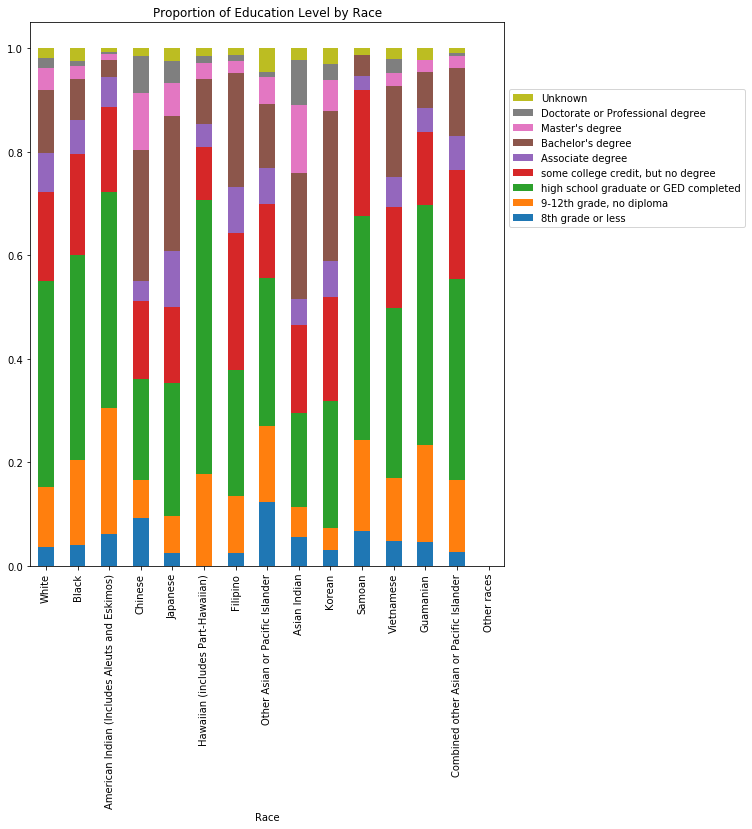

In [20]:
# Note that 'Other Race' has no data so proportion is not shown

# Calculate Proportion of Education Level by Race
r_df = cdf[cdf['Cause'] == 'Suicide'].groupby([cdf['Race'],cdf['Education']]).size()
r_df = r_df.groupby(level=[0]).apply(lambda x: x / x.sum()).unstack()
r_df = r_df[list(edu_dict.values())]
r_df = r_df.reindex(list(race_dict.values())).drop_duplicates(keep='first')

# Show Table
display(r_df)

# Stacked bar plot
fig, axes = plt.subplots()
r_df.plot.bar(stacked='True', ax=axes, figsize=(10,10))

# Set labels and ticks
axes.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])

# Adjust Plot Size
box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.85, box.height])

# Flip Legend
h, l = axes.get_legend_handles_labels()
plt.legend(reversed(h), reversed(l), loc = 'center left', bbox_to_anchor=(1, 0.75))

plt.title("Proportion of Education Level by Race")
plt.xlabel('Race')

plt.show()
del r_df

These bar plots show the different proportions of education level by race for those reported as suicides. The greatest proportion across the majority of races is ‘high school graduate, or GED equivalent’. The Chinese, Japanese, Filipino, Asian Indian, and Korean all also have a high proportion of Bachelor’s degree. Asian Indian’s have the biggest proportion of Master’s, and Doctorate or Professional degrees, followed by the Chinese.

### 3. Proportion of Education Level by Age Group

Education,8th grade or less,"9-12th grade, no diploma",high school graduate or GED completed,"some college credit, but no degree",Associate degree,Bachelor's degree,Master's degree,Doctorate or Professional degree,Unknown
Age,,,,,,,,,
Less than 5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5 - 9 years,0.964286,0.035714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 - 14 years,0.785196,0.208515,NaN,NaN,NaN,NaN,NaN,NaN,0.006289
15 - 19 years,0.025227,0.594117,0.254009,0.116433,0.003473,NaN,NaN,NaN,0.006741
20 - 24 years,0.013580,0.123631,0.454273,0.291735,0.051447,0.053282,0.002202,0.000489,0.009360
25 - 29 years,0.017899,0.116639,0.418335,0.228333,0.078486,0.106865,0.016663,0.006182,0.010598
30 - 34 years,0.022556,0.115632,0.416869,0.189910,0.083556,0.118482,0.028862,0.010369,0.013764
35 - 39 years,0.026411,0.113387,0.412400,0.176074,0.085165,0.122565,0.034715,0.014048,0.015235
40 - 44 years,0.024979,0.094551,0.400501,0.176464,0.088709,0.136580,0.044533,0.016693,0.016991


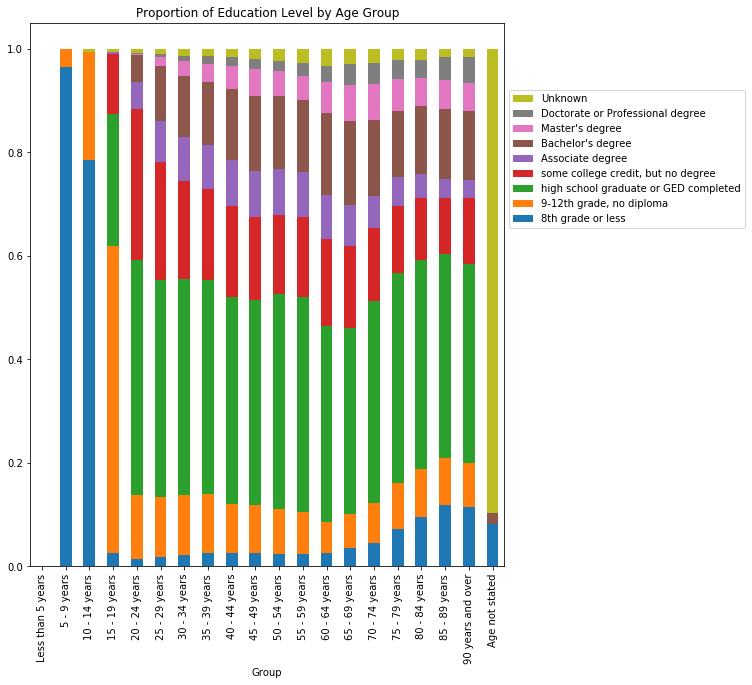

In [21]:
# No suicide for age 'Less than 5 years' because no entries


# Calculate Proportion of Education Level by Age
a_df = cdf[cdf['Cause'] == 'Suicide'].groupby([cdf['Age'],cdf['Education']]).size()
a_df = a_df.groupby(level=[0]).apply(lambda x: x / x.sum()).unstack()
a_df = a_df[list(edu_dict.values())]
a_df = a_df.reindex(list(age_dict.values()))

# Show Table
display(a_df)

# Stacked bar plot
fig, axes = plt.subplots()
a_df.plot.bar(stacked='True', ax=axes, figsize=(10,10))

# Set labels and ticks
axes.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])

# Adjust Plot Size
box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.85, box.height])

# Flip Legend
h, l = axes.get_legend_handles_labels()
plt.legend(reversed(h), reversed(l), loc = 'center left', bbox_to_anchor=(1, 0.75))

plt.title("Proportion of Education Level by Age Group")
plt.xlabel('Group')

plt.show()
del a_df

These bar plots show the proportion of education level by age group for those reported as suicides. As would be expected, the younger age demographics have the biggest proportion of the education levels reserved for their age group. Age groups from 60 to 70 years show the biggest proportions of Doctorate, Master’s, and Bachelor’s degrees.

# Data Analysis & Results

### 1. Ratio for Natural Death / Suicide by Gender 

In [22]:
#Ratio for natural deaths : Gender
nMale = NG[1]/(NG[1]+NG[0])
nFemale = NG[0]/(NG[1]+NG[0])
print('The ratio of Male to Female for Natural deaths is: Male ' + str(nMale*100)
     + ' to Female ' + str(nFemale*100))

#Ratio for suicidal deaths : Gender
sMale = SG[0]/(SG[1]+SG[0])
sFemale = SG[1]/(SG[1]+SG[0])
print('The ratio of Male to Female for Suicidal deaths is: Male ' + str(sMale*100)
     + ' to Female ' + str(sFemale*100))

The ratio of Male to Female for Natural deaths is: Male 49.3556897224 to Female 50.6443102776
The ratio of Male to Female for Suicidal deaths is: Male 77.4304577591 to Female 22.5695422409


In [23]:
#checking for significant difference between 
# gender ratios for natural vs suicidal deaths

#create dict for male:1 female:0
gender_map = {'M':1,'F':0}

#get natural deaths by gender
NGD = cdf[cdf['Cause'] == 'Natural']['Sex']
#change the gender desciptions to numbers 0 and 1
#NGD = NGD['Sex'].map(gender_map)
NGC = NGD.value_counts()

#get suicide deaths by education
SGD = cdf[cdf['Cause'] == 'Suicide']['Sex']
#change the gender desciptions to numbers 0 and 1
#SGD = SGD['Sex'].map(gender_map)
SGC = SGD.value_counts()

chisq, p_val_chi = stats.chisquare(np.array([NGC.values, SGC.values]), axis=None)

if p_val_chi < 0.01:
    print('There is a significant difference in ratio between' \
          'gender of natural deaths and gender of suicidal deaths!')

There is a significant difference in ratio betweengender of natural deaths and gender of suicidal deaths!


Shown here is the code where we calculated the different ratios of both natural death and suicide death in males vs females. When finding the ratio of male to female rates of death for both natural death and suicide, it is shown that the ratio for natural deaths are about even, with a 1:1 ratio.

For suicide rates however, there appears to be a clear difference in ratios between male and female rates, with males on average being more likely to commit suicide than females in the US. There has been studies done on this in the past too that support the claim that males are statistically more likely to commit suicide than females.

### 2. Mean Age Group of Natural Death and Suicide

In [24]:
#Mean of Age for Natural Deaths

#create natural death age dictionary from age range values and descriptions
nAgeDict = dict(zip(list(age_dict.values()), NA))

#get the mean value in the dictionary
nMeanPos = 0
for i in NA:
    nMeanPos = nMeanPos + i
nMeanPos = nMeanPos/2

#get the key(description) for the mean age range
nSum = 0
nMeanAge = ""
for key,value in nAgeDict.items():
    nSum = nSum + value
    if nSum > nMeanPos:
        break
    nMeanAge = key
print('The mean of ages for natural deaths is : ' + nMeanAge)
#Mean of Age for Suicidal Deaths

#create suicidal death age dictionary from age range values and descriptions
sAgeDict = dict(zip(list(age_dict.values()), SA))

#delete first entry because first value is NaN
del sAgeDict['Less than 5 years']

#get the mean value in the dictionary
sMeanPos = 0
for key,value in sAgeDict.items():
    sMeanPos = sMeanPos + value
sMeanPos = sMeanPos/2

#get the key(description) for the mean age range
sSum = 0
sMeanAge = ""
for key,value in sAgeDict.items():
    sSum = sSum + value
    if sSum > sMeanPos:
        break
    sMeanAge = key
print('The mean of ages for suicidal deaths is : ' + sMeanAge)

The mean of ages for natural deaths is : 70 - 74 years
The mean of ages for suicidal deaths is : 40 - 44 years


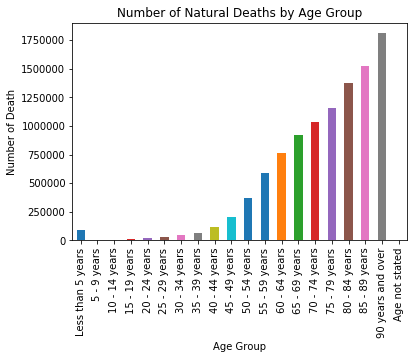

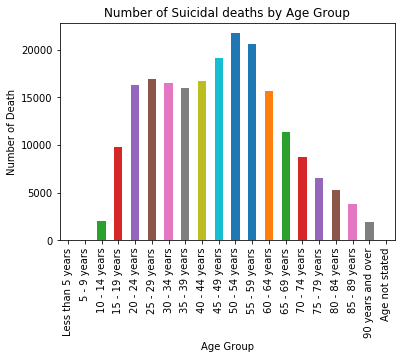

There is a significant difference betweenmean age range of natural deaths and mean age range of suicidal deaths!


In [25]:
#checking for significant difference between 
# age ranges for natural vs suicidal deaths

#invert the age dictionary key:value and change string to number
age_inv_map = dict((v, int(k)-25) for k, v in age_dict.items())
age_inv_map.pop('Age not stated', None)

#get natural deaths by age
NAD = cdf[cdf['Cause'] == 'Natural']
NAD = NAD[NAD['Age'] != 'Age not stated'] 

#outliers
naplot = NA.plot(kind='bar', title = "Number of Natural Deaths by Age Group" )
naplot.set_xlabel("Age Group")
naplot.set_ylabel("Number of Death")
plt.show()

#we delete the outlier Less than 5 years because the two dataframes need to have 
#same set of values for comparison for the chi square test. Aka suicidal deaths do 
#not include values for less than 5 years. 
NAD = NAD[NAD['Age'] != 'Less than 5 years']
NAD = NAD['Age'].map(age_inv_map)
NAC = NAD.value_counts()

#get suicide deaths by age
SAD = cdf[cdf['Cause'] == 'Suicide']
SAD = SAD[SAD['Age'] != 'Age not stated']
SAD = SAD['Age'].map(age_inv_map)
SAC = SAD.value_counts()

saplot = SA.plot(kind='bar', title = "Number of Suicidal deaths by Age Group" )
saplot.set_xlabel("Age Group")
saplot.set_ylabel("Number of Death")
plt.show()

chisq, p_val_chi = stats.chisquare(np.array([NAC.values, SAC.values]), axis=None)

if p_val_chi < 0.01:
    print('There is a significant difference between' \
    'mean age range of natural deaths and mean age range of suicidal deaths!')
del NAD
del NAC
del SAD
del SAC

Shown here is the code we used to calculate the mean age group for natural deaths and suicide deaths, which came out to be about 70-74 years old in natural deaths and 40-44 years old in suicide deaths We also calculated that based on the averages of both natural and suicide deaths, there is a significant differnece between the age range of natural vs suicide deaths

In [26]:
#Mean of Education for Natural Deaths

#create natural death education dictionary from education values and descriptions
nEduDict = dict(zip(list(edu_dict.values()), NE))

#get the mean value in the dictionary
nMeanPos = 0
for i in NA:
    nMeanPos = nMeanPos + i
nMeanPos = nMeanPos/2

#get the key(description) for the mean age range
nSum = 0
nMeanEdu = ""
for key,value in nEduDict.items():
    nSum = nSum + value
    if nSum > nMeanPos:
        break
    nMeanEdu = key
print('The mean of education for natural deaths is : ' + nMeanEdu)
print()
#Mean of Education for Suicidal Deaths

#create suicidal death education dictionary from education values and descriptions
sEduDict = dict(zip(list(edu_dict.values()), SE))

#get the mean value in the dictionary
sMeanPos = 0
for key,value in sEduDict.items():
    sMeanPos = sMeanPos + value
sMeanPos = sMeanPos/2

#get the key(description) for the mean age range
sSum = 0
sMeanEdu = ""
for key,value in sEduDict.items():
    sSum = sSum + value
    if sSum > sMeanPos:
        break
    sMeanEdu = key
print('The mean of education for suicidal deaths is : ' + sMeanEdu)


The mean of education for natural deaths is : 9-12th grade, no diploma

The mean of education for suicidal deaths is : 9-12th grade, no diploma


Shown here is the mean education level for both natural and suicide deaths, with the results showing the same mean education level in both: 9th-12th grade, no diploma. Even though these are the same average, the majority of people in the US finish high school, so we need to go on and use another method of analyzing the data that we have gathered, with the new method being t-tests of the two types of death

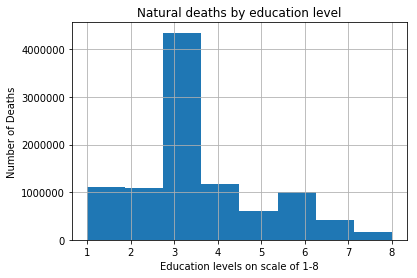

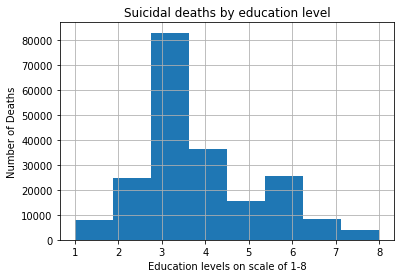

In [27]:
# Analyzation of distributions
# Cleaning up data so that we can get values from it to test distributions

#invert the education dictionary key:value and change string to number
edu_inv_map = dict((v, int(k)) for k, v in edu_dict.items())
edu_inv_map.pop('Unknown', None)

#get natural deaths by education and drop unknown
NED = cdf[cdf['Cause'] == 'Natural']
NED = NED[NED['Education'] != 'Unknown']
#change the desciptions to numbers 1-9
NEN = NED['Education'].map(edu_inv_map)
#reset index from 0
NEN = NEN.reset_index(drop=True)

#get suicide deaths by education
SED = cdf[cdf['Cause'] == 'Suicide']
SED = SED[SED['Education'] != 'Unknown']
#change the desciptions to numbers 1-9
SEN = SED['Education'].map(edu_inv_map)
#reset index from 0
SEN = SEN.reset_index(drop=True)

#showing histogram of Natural deaths by education
nenhist = NEN.hist(bins=8)
plt.title("Natural deaths by education level")
nenhist.set_xlabel("Education levels on scale of 1-8")
nenhist.set_ylabel("Number of Deaths")
plt.show()
#showing histogram of Suicide deaths by education
senhist = SEN.hist(bins=8)
plt.title("Suicidal deaths by education level")
senhist.set_xlabel("Education levels on scale of 1-8")
senhist.set_ylabel("Number of Deaths")
plt.show()

In [28]:
#test if the data is normal distribution or not
NDNE = NEN.values
NDSE = SEN.values
st_ne,p_ne = normaltest(NDNE)
st_se,p_se = normaltest(NDSE)
is_n_ne = False if (p_ne<0.01) else True
is_n_se = False if (p_se<0.01) else True
print('Are natural deaths by education a normal distribution? ' + str(is_n_ne))
print('Are suicide deaths by education a normal distribution? ' + str(is_n_se))
#even though it kind of looks like a normal distribution, it is not

Are natural deaths by education a normal distribution? False
Are suicide deaths by education a normal distribution? False


In [29]:
#Test for skewed distribution
print('Skew of education levels of natural deaths: ' + str(NEN.skew()))
print('Skew of education levels of suicidal deaths: ' + str(SEN.skew()))

Skew of education levels of natural deaths: 0.727296545912
Skew of education levels of suicidal deaths: 0.725270848139


If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. Since the skew functions both return a positive value between 0.5 and 1, we know that the both sets of data are skewed right, meaning that its right tail is longer and most of the distribution is at the left.

In [30]:
#Mean educational levels of natural vs suicidal deaths
#lower number means lower level of education on a level from 1-8
#Mean educational level of natural deaths 
print('On a scale of 1-8: ')
print('Mean education level of natural deaths: ' + str(NEN.mean()))
#Mean educational level of suicidal deaths
print('Mean education level of suicidal deaths: ' + str(SEN.mean()))
#conclusion: They look different. 
#            Let's test if the difference is actually significant

#Testing for significance between natural deaths by education 
# and suicide deaths by education
NENV = NEN.value_counts()
SENV = SEN.value_counts()
chisq, p_val_chi = stats.chisquare(np.array([NENV.values, SENV.values]), axis=None)

if p_val_chi < 0.01:
    print('There is a significant difference in ratios between' \
    'educational levels of natural deaths and educational levels of suicidal deaths!')
#conclusion: education levels for suicidal deaths is higher in comparision to
#education levels for natural deaths.

On a scale of 1-8: 
Mean education level of natural deaths: 3.45788636518
Mean education level of suicidal deaths: 3.7646193561
There is a significant difference in ratios betweeneducational levels of natural deaths and educational levels of suicidal deaths!


By graphing both types of death to see if they are normally distributed, we find that in fact neither of the two types of death are normally distributed, but are both rather skewed to the right, so most of the distribution of the graphs appears to be on the left side. However, when we perform a chi squared analysis on the two distributions, it is found that there is in fact a statistically significant distribution between the ratio of natural deaths and suicide deaths in relation to education levels!

# Ethics & Privacy

The data we accessed to ascertain whether or not our hypothesis was true were all found publicly on the Centers for Disease Control and Prevention website. In accordance to the Data User Agreement, this project will limit the use of the data set to independent research/analysis, restrict online release/publication, and caution against identification. (https://www.cdc.gov/nchs/data_access/restrictions.htm).

The CDC website states that their mortality data is collected through the National Health Center for Health Statistics that partners with state, and local health departments to collect data. Reported cases come as a result of death certificates that have been filed, and categorized by cause of death -- the surviving next of kin who submit these certificates are also granting consent for this data to the census. There was no need to apply the Safe Harbor Method to remove personally identifiable information because data from 2005 to present has been anonymized with no exact date or geographical location information. The data published by the CDC provides statistics purely based on non-identifying information such as race, age, education level and so forth. However precautions were taken by combining the ages from 90 to 125+ years old into age range '90 years and older' because the number of individuals who have died in a given year was limited. Due to the high anonymity and public availability there is no significant need to protect, secure, or delete the data findings from this project.

Overall, the nature of our data can be regarded as highly controversial. Suicide is a topic that is not often discussed, and analysed even less. Tying such an issue with something so common as education can lead to an oversimplification of the importance of either issue. The focus of our project is to better understand how data from multiple different data sets can be cross analysed with that from others to try and find patterns of positive correlation. Our main purpose is not however to discredit higher education, and name it as an instigator for rising suicide rates. Doubly, we must consider that there are often issues of whether or not all proper cases of suicide are reported. It can also be said that those from regions with access to less education, and cases of suicide might also have less resources to go about reporting the incident to any sort of census -- potentially skewing equitable analysis. There is also the concern that given the general controversial nature of a suicide, there may be less reported cases than the true number of cases that actually did occur. Regardless of whether or not our hypothesis is proven false, or not, we have to be careful not to imply that correlation necessary results in causation. The correlation of one to another can not, and should not be regarded as a direct effect, and consequence of one another in any context.


# Conclusion & Discussion

In conclusion, our hypothesis seems to be supported by the data that we cleaned and analyzed: there appears to be a significant difference in the ratios between people with higher educations that committed suicide compared to those that had natural deaths. Through our data gathering, we found that, regardless of gender, race, or age, the ratio of those that had a higher education were found to be more likely to commit suicide than those of the same gender, race, or age that had largely not completed a higher education.

If we were to run through this data again, we would choose to focus more on education rates in relation to death rates. Given our findings this time on the relationship between sex, and race we feel that it is not significant enough to affect our findings. We were limited to CDC data that only consists of data from the US, and due to the large nature of the data we were limited to a five year range (2013-2017). We would also look at statistics for death rates outside of the United States, as well as from a larger time frame. Additionally, given that the United States is a first-world country with more access to public education, education rates are heavily skewed. Looking at data from other countries with different levels of access to education would help to diversify the dataset.

Despite our limitations, we still argue that our data findings are statistically significant within the context of the United States, and that our findings can be used as a platform for further research into the future.